In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/22608.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/23274.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/23775.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/22046.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/23436.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/20684.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/20554.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/21093.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/24287.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/20762.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/24036.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/21808.jpg
/kaggle/input/intel-image-dataset/Intel Image Dataset/mountain/21118.jpg
/kaggle/input/intel-image-dataset/Intel Image Datas

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/intel-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/intel-image-dataset


In [2]:
import os

def count_folders_and_images(dataset_path):
    total_folders = 0
    total_images = 0
    for root, dirs, files in os.walk(dataset_path):
        total_folders += len(dirs)  # Count all directories
        total_images += len([file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])

    return total_folders, total_images

In [3]:
# Replace `path` with the actual path to your downloaded dataset folder
dataset_path = "/kaggle/input/intel-image-dataset/Intel Image Dataset"
num_folders, num_images = count_folders_and_images(dataset_path)

print(f"Number of folders (including subfolders): {num_folders}")
print(f"Number of images: {num_images}")

Number of folders (including subfolders): 6
Number of images: 3000


In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir = "/kaggle/input/intel-image-dataset/Intel Image Dataset" 
output_dir = '/kaggle/working/split_dataset' 
train_ratio = 0.8  

# Create output directories for train and test
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each category (subfolder) in the dataset
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    # Split the dataset into train and test
    train_images, test_images = train_test_split(images, train_size=train_ratio, random_state=42)

    # Create category subfolders in train and test directories
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # Move images to respective directories
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_dir, image))

    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(test_category_dir, image))

print(f"Dataset split complete!\nTrain directory: {train_dir}\nTest directory: {test_dir}")


Dataset split complete!
Train directory: /kaggle/working/split_dataset/train
Test directory: /kaggle/working/split_dataset/test


Random Train Images:
Showing random images from category: street


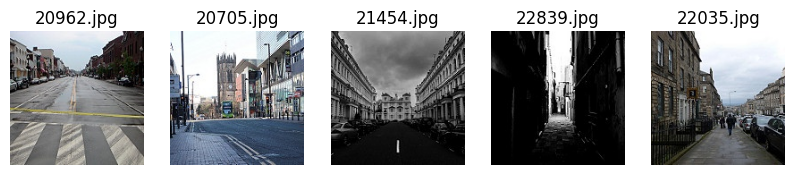

Random Test Images:
Showing random images from category: sea


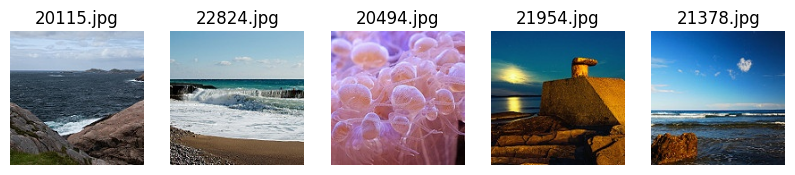

In [6]:
import os
import random
from matplotlib import pyplot as plt
from PIL import Image

directory = "/kaggle/input/intel-image-dataset/Intel Image Dataset" 

def show_random_images(directory, num_images=5):
    """
    Display random images from a directory.
    
    Args:
        directory (str): Path to the directory containing category subfolders.
        num_images (int): Number of random images to display.
    """
    # Get all category subfolders
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    if not categories:
        print(f"No categories found in {directory}")
        return

    # Select random category and images
    category = random.choice(categories)
    category_path = os.path.join(directory, category)
    images = os.listdir(category_path)
    if not images:
        print(f"No images found in category {category} of {directory}")
        return

    random_images = random.sample(images, min(len(images), num_images))

    # Display images
    print(f"Showing random images from category: {category}")
    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(random_images, start=1):
        image_path = os.path.join(category_path, image_name)
        image = Image.open(image_path)
        plt.subplot(1, len(random_images), i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

# Display random images from train and test directories
print("Random Train Images:")
show_random_images('/kaggle/working/split_dataset/train')

print("Random Test Images:")
show_random_images('/kaggle/working/split_dataset/test')


Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with 0 layers unfrozen...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 244ms/step - accuracy: 0.2930 - loss: 1.8355 - val_accuracy: 0.5083 - val_loss: 1.3022
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4911 - loss: 1.2244 - val_accuracy: 0.5797 - val_loss: 1.1081
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.5772 - loss: 1.0505 - val_accuracy: 0.5565 - val_loss: 1.0971
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.6163 - loss: 0.9719 - val_accuracy: 0.5382 - val_loss: 1.0834
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.6353 - loss: 0.9381 - val_accuracy: 0.5116 - val_loss: 1.0759
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.6364 - loss: 0.9140 - val_accuracy: 0.5814 - val_loss: 0.9967
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.6649 - loss: 0.8798 - val_accuracy: 0.5864 - val_loss: 0.9672
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.6785 - loss: 0.8140 - val_accuracy: 0.6312 - val

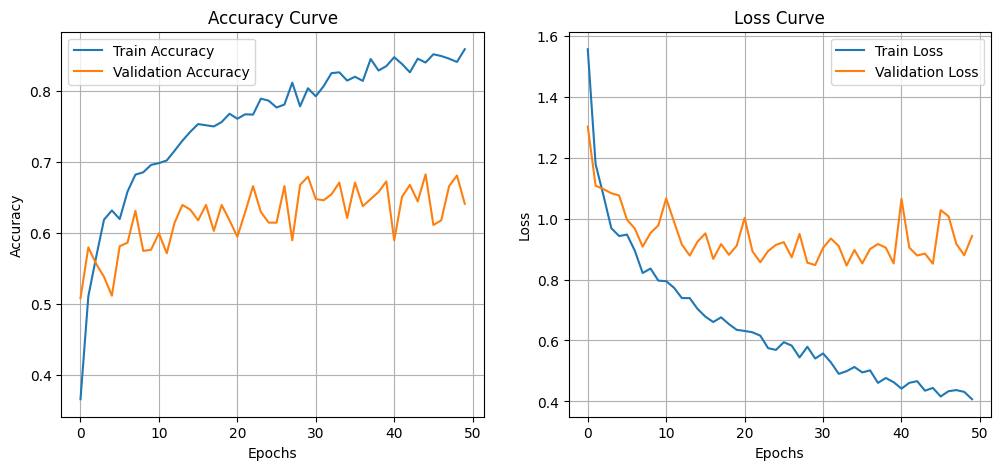

Confusion Matrix:
 [[60  2  1  5  3 17]
 [ 4 74  0  2 10  5]
 [ 2  0 38 52 18  1]
 [ 1  0  7 82 15  0]
 [ 4  0  8 28 61  1]
 [17  3  0  6  4 71]]


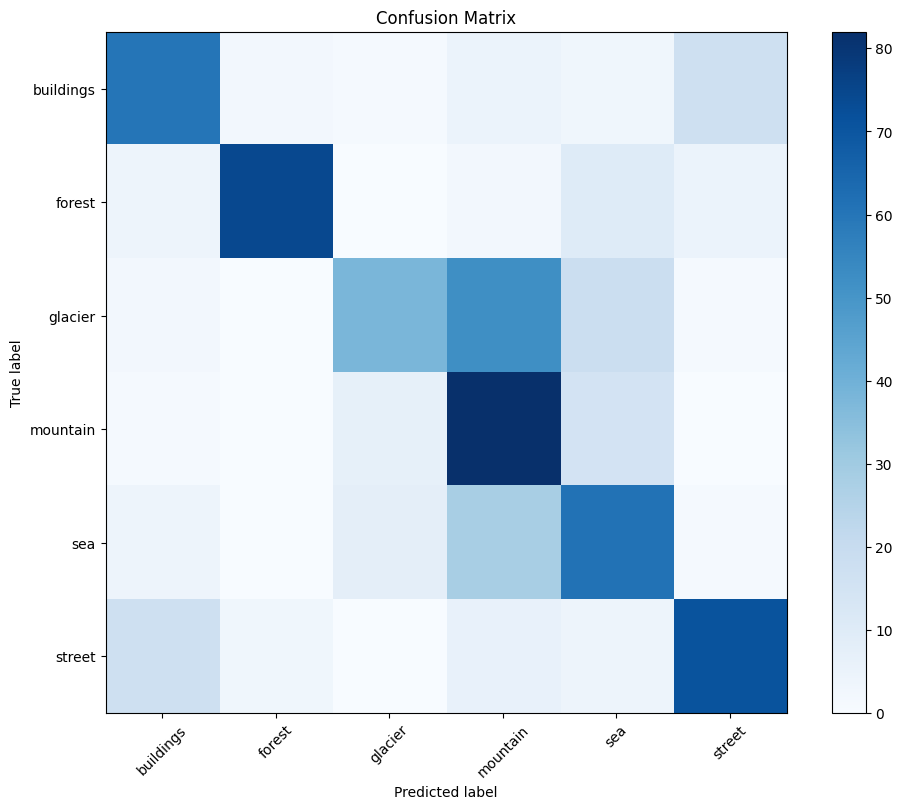

Classification Report:
               precision    recall  f1-score   support

   buildings       0.68      0.68      0.68        88
      forest       0.94      0.78      0.85        95
     glacier       0.70      0.34      0.46       111
    mountain       0.47      0.78      0.59       105
         sea       0.55      0.60      0.57       102
      street       0.75      0.70      0.72       101

    accuracy                           0.64       602
   macro avg       0.68      0.65      0.65       602
weighted avg       0.68      0.64      0.64       602



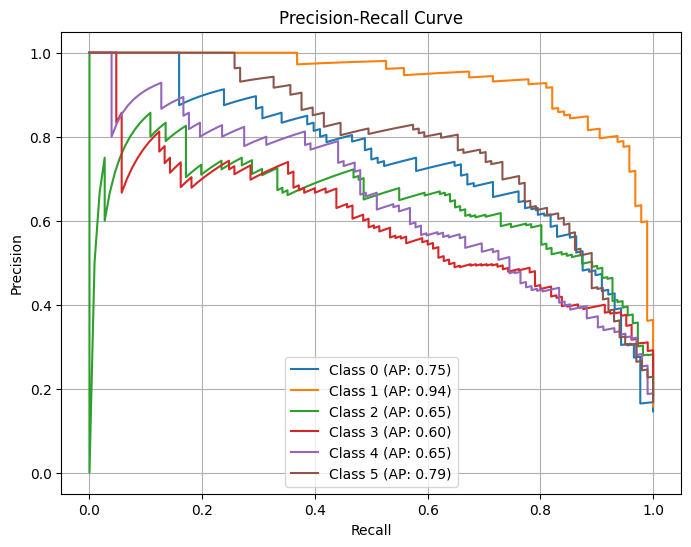


Training with 35 layers unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - accuracy: 0.4290 - loss: 2.3000 - val_accuracy: 0.2458 - val_loss: 1.9547
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.6561 - loss: 0.8812 - val_accuracy: 0.2890 - val_loss: 1.7476
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.7101 - loss: 0.7709 - val_accuracy: 0.5199 - val_loss: 1.1752
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.7206 - loss: 0.6897 - val_accuracy: 0.5116 - val_loss: 1.2620
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.7784 - loss: 0.5810 - val_accuracy: 0.5648 - val_loss: 1.2171
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.8005 - loss: 0.5330 - val_accuracy: 0.5831 - val_loss: 1.1356
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.7955 - loss: 0.5316 - val_accuracy: 0.6113 - val_loss: 1.0408
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accur

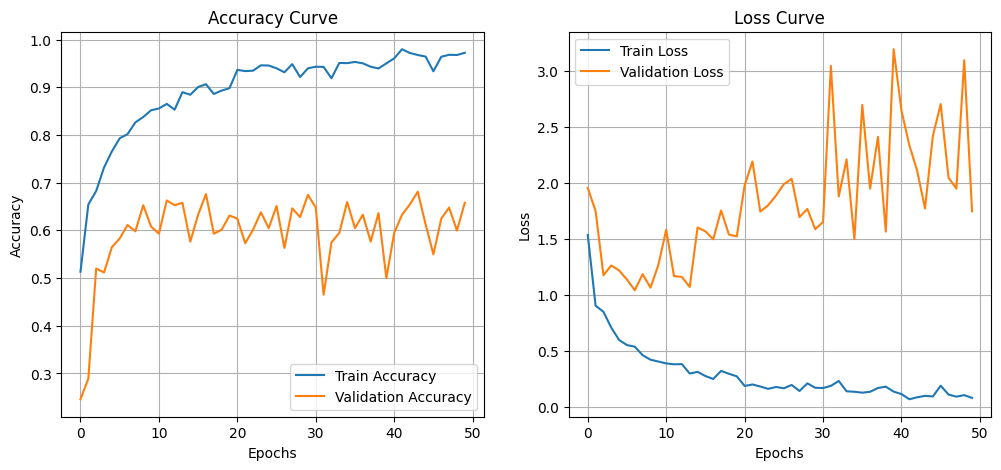

Confusion Matrix:
 [[74  1  2  1  2  8]
 [11 66  5  1  6  6]
 [ 6  0 71 10 21  3]
 [ 9  0 17 52 26  1]
 [ 5  0 21  9 67  0]
 [26  3  1  1  4 66]]


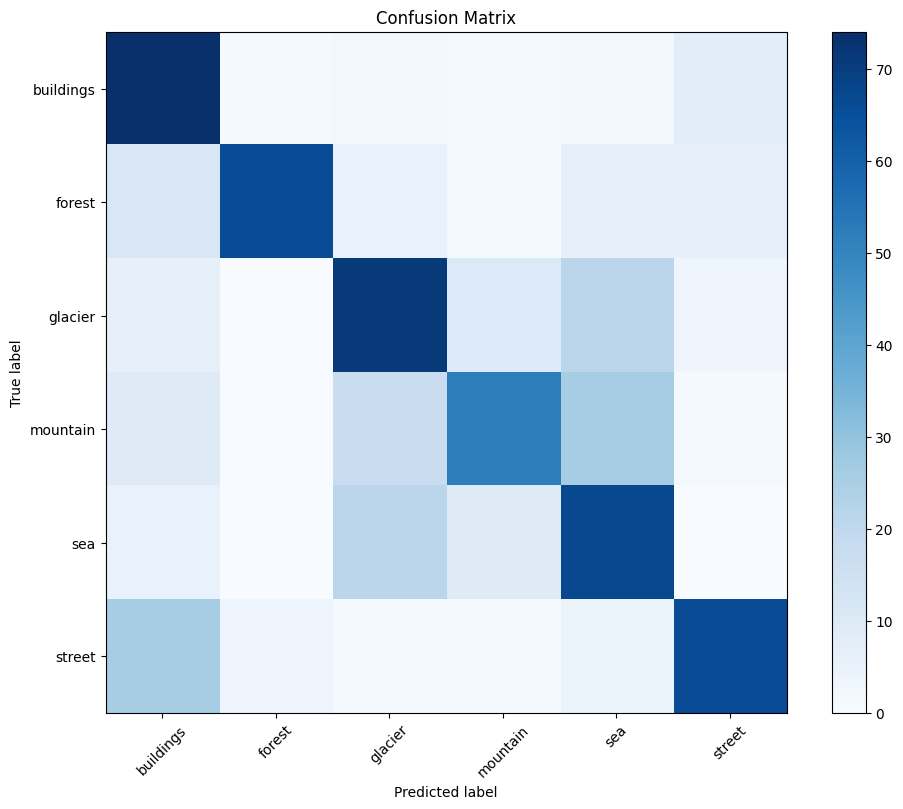

Classification Report:
               precision    recall  f1-score   support

   buildings       0.56      0.84      0.68        88
      forest       0.94      0.69      0.80        95
     glacier       0.61      0.64      0.62       111
    mountain       0.70      0.50      0.58       105
         sea       0.53      0.66      0.59       102
      street       0.79      0.65      0.71       101

    accuracy                           0.66       602
   macro avg       0.69      0.66      0.66       602
weighted avg       0.69      0.66      0.66       602



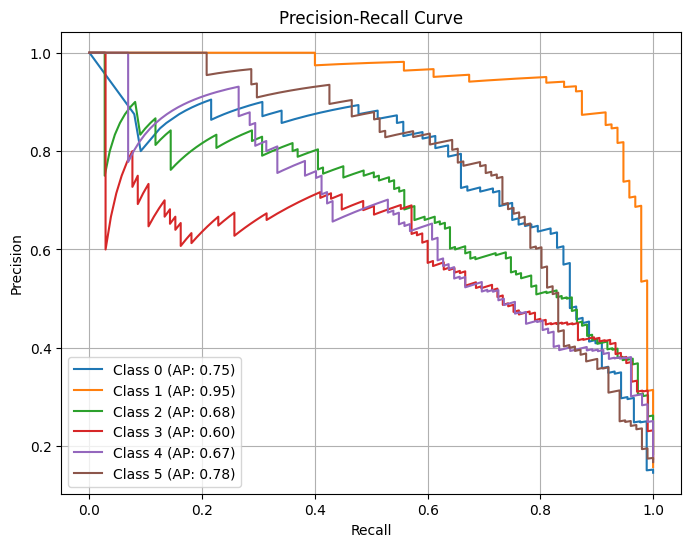


Training with 70 layers unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 355ms/step - accuracy: 0.3610 - loss: 2.5477 - val_accuracy: 0.3056 - val_loss: 1.6622
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - accuracy: 0.5569 - loss: 1.0353 - val_accuracy: 0.3289 - val_loss: 1.5120
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - accuracy: 0.6213 - loss: 0.9258 - val_accuracy: 0.4053 - val_loss: 1.7145
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - accuracy: 0.6828 - loss: 0.8056 - val_accuracy: 0.4203 - val_loss: 2.1560
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.7226 - loss: 0.7335 - val_accuracy: 0.5282 - val_loss: 1.5722
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.6926 - loss: 0.7562 - val_accuracy: 0.4485 - val_loss: 1.5550
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.7527 - loss: 0.6507 - val_accuracy: 0.4651 - val_loss: 1.3974
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accur

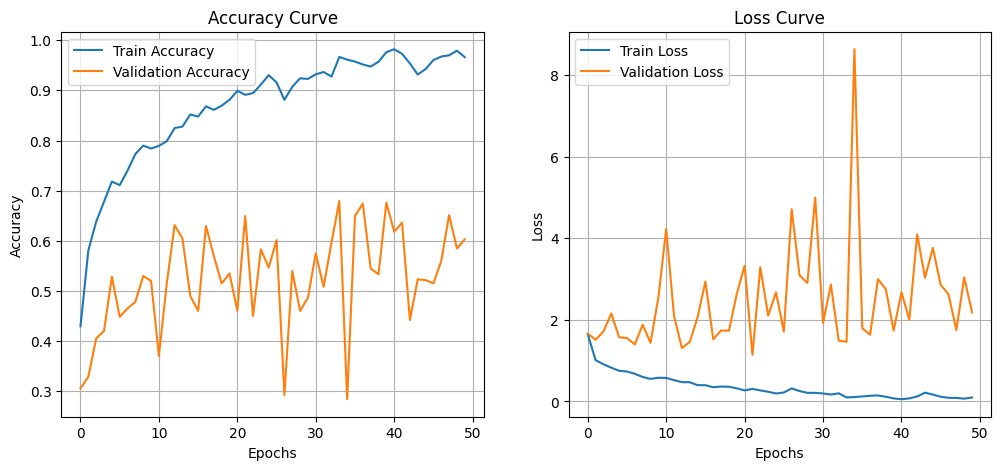

Confusion Matrix:
 [[37  7  2  0  5 37]
 [ 0 89  0  0  3  3]
 [ 0 11 44 11 44  1]
 [ 1  3 19 24 57  1]
 [ 0  5  7  1 85  4]
 [ 3  9  0  2  3 84]]


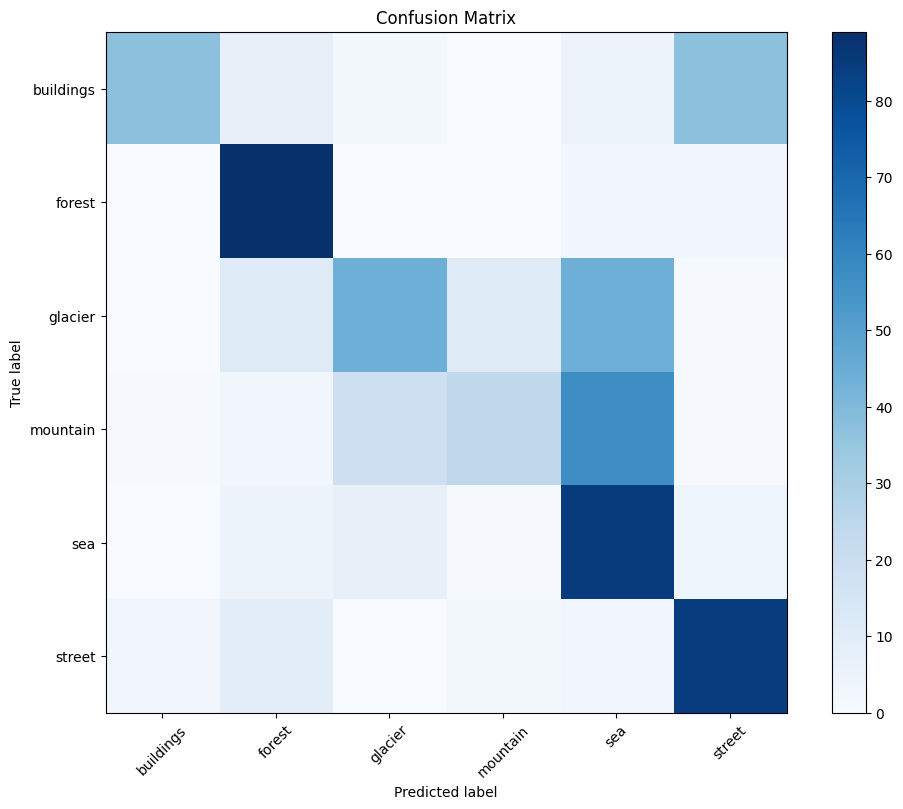

Classification Report:
               precision    recall  f1-score   support

   buildings       0.90      0.42      0.57        88
      forest       0.72      0.94      0.81        95
     glacier       0.61      0.40      0.48       111
    mountain       0.63      0.23      0.34       105
         sea       0.43      0.83      0.57       102
      street       0.65      0.83      0.73       101

    accuracy                           0.60       602
   macro avg       0.66      0.61      0.58       602
weighted avg       0.65      0.60      0.58       602



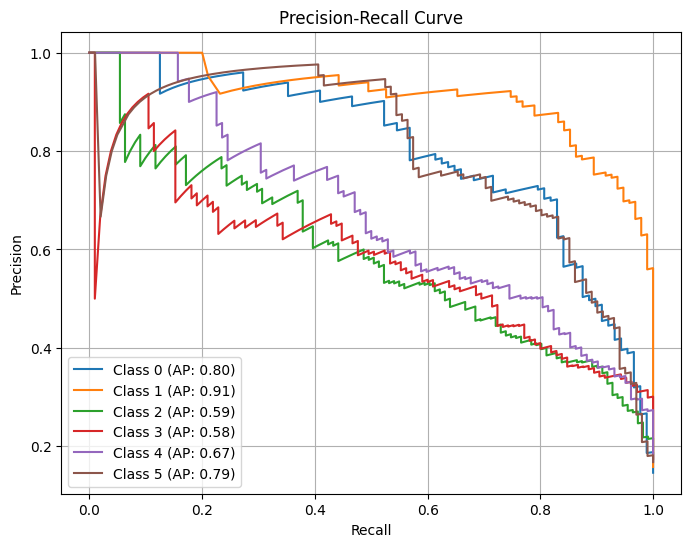


Training with 105 layers unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 66s 442ms/step - accuracy: 0.3997 - loss: 2.3164 - val_accuracy: 0.1927 - val_loss: 2.0614
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 216ms/step - accuracy: 0.7053 - loss: 0.8179 - val_accuracy: 0.3023 - val_loss: 2.5671
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 216ms/step - accuracy: 0.7698 - loss: 0.6511 - val_accuracy: 0.4302 - val_loss: 2.3414
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.8214 - loss: 0.4731 - val_accuracy: 0.4568 - val_loss: 2.4068
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - accuracy: 0.8717 - loss: 0.3642 - val_accuracy: 0.5963 - val_loss: 1.2726
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.9129 - loss: 0.2344 - val_accuracy: 0.5498 - val_loss: 1.7638
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.9425 - loss: 0.1818 - val_accuracy: 0.5814 - val_loss: 1.5582
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accu

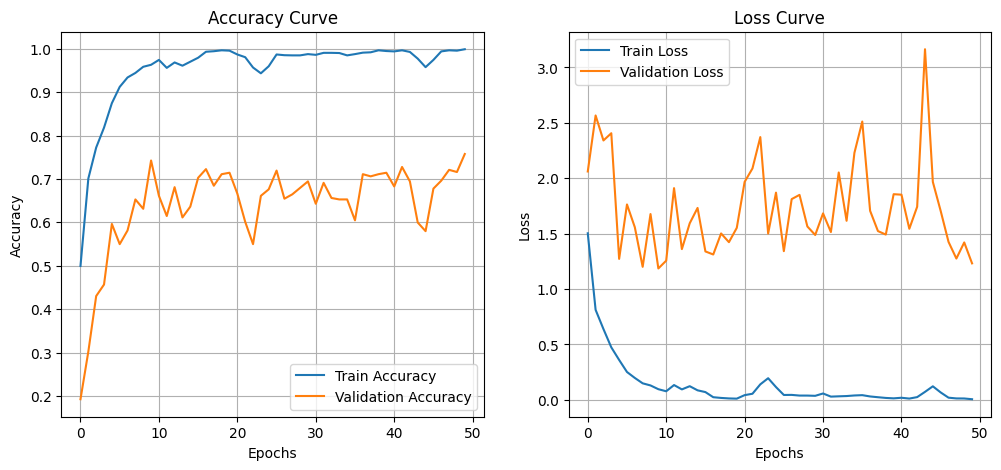

Confusion Matrix:
 [[65  4  2  0  3 14]
 [ 3 89  1  0  1  1]
 [ 2  1 80 19  7  2]
 [ 3  0 23 69  9  1]
 [ 2  1 15 12 70  2]
 [11  4  0  2  1 83]]


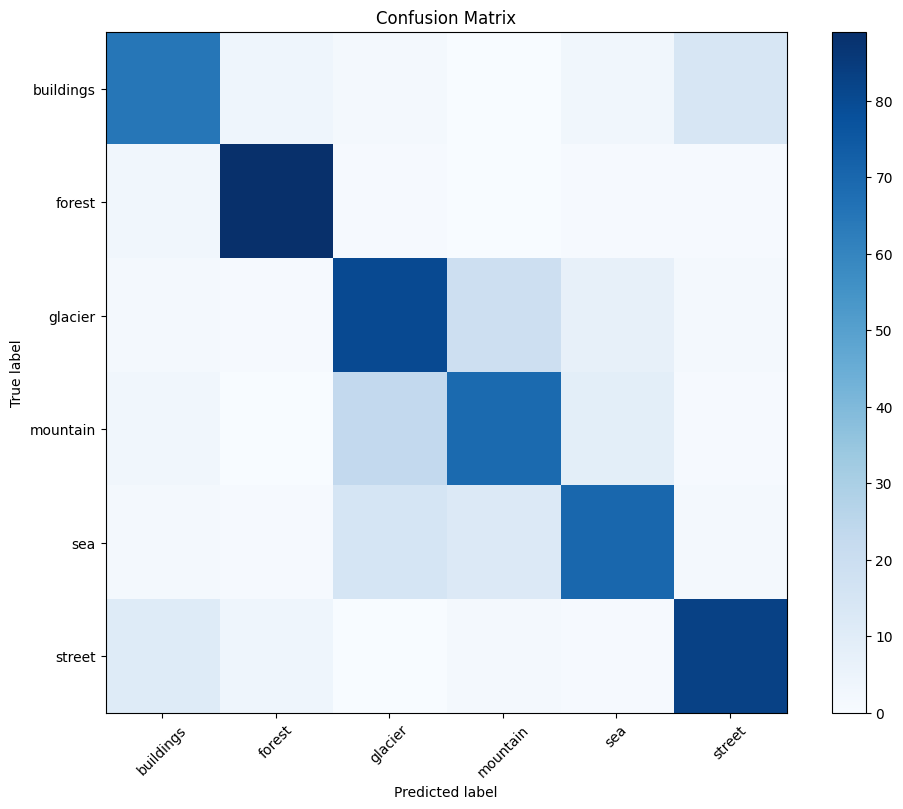

Classification Report:
               precision    recall  f1-score   support

   buildings       0.76      0.74      0.75        88
      forest       0.90      0.94      0.92        95
     glacier       0.66      0.72      0.69       111
    mountain       0.68      0.66      0.67       105
         sea       0.77      0.69      0.73       102
      street       0.81      0.82      0.81       101

    accuracy                           0.76       602
   macro avg       0.76      0.76      0.76       602
weighted avg       0.76      0.76      0.76       602



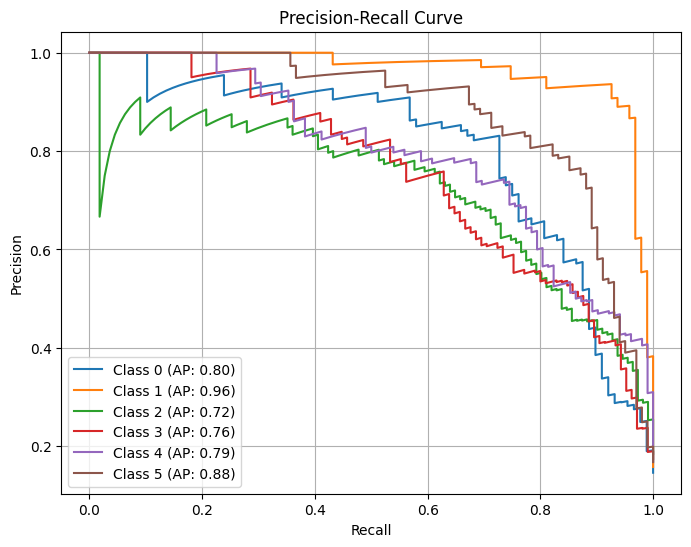


Training with 140 layers unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 529ms/step - accuracy: 0.5763 - loss: 1.4138 - val_accuracy: 0.2375 - val_loss: 1.8817
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.8757 - loss: 0.3303 - val_accuracy: 0.3771 - val_loss: 1.8219
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.9070 - loss: 0.2797 - val_accuracy: 0.5648 - val_loss: 1.1536
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - accuracy: 0.9664 - loss: 0.0958 - val_accuracy: 0.7243 - val_loss: 0.8577
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - accuracy: 0.9724 - loss: 0.0695 - val_accuracy: 0.7060 - val_loss: 1.2134
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.9781 - loss: 0.0786 - val_accuracy: 0.7990 - val_loss: 0.9398
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.9842 - loss: 0.0528 - val_accuracy: 0.8023 - val_loss: 1.1181
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accu

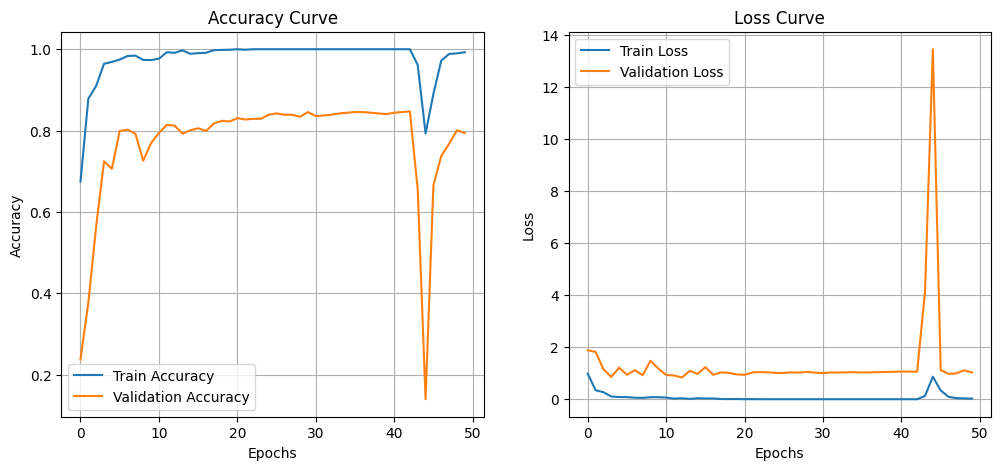

Confusion Matrix:
 [[75  1  1  5  1  5]
 [ 3 87  1  1  3  0]
 [ 1  0 83 20  7  0]
 [ 0  0 13 87  5  0]
 [ 2  0 11 15 74  0]
 [26  0  1  1  1 72]]


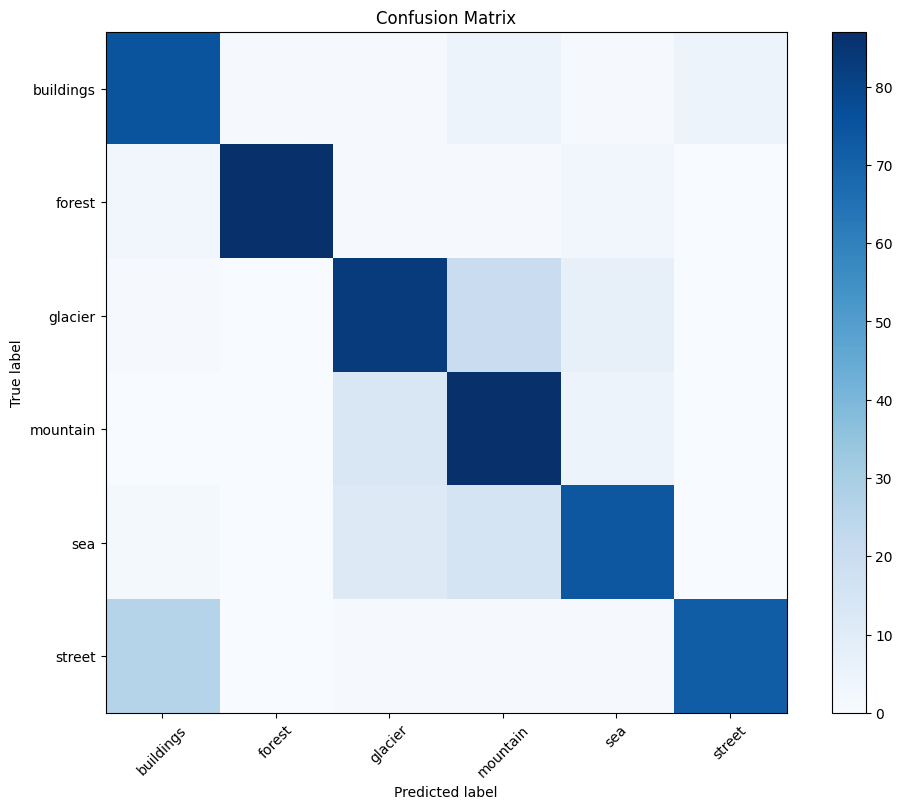

Classification Report:
               precision    recall  f1-score   support

   buildings       0.70      0.85      0.77        88
      forest       0.99      0.92      0.95        95
     glacier       0.75      0.75      0.75       111
    mountain       0.67      0.83      0.74       105
         sea       0.81      0.73      0.77       102
      street       0.94      0.71      0.81       101

    accuracy                           0.79       602
   macro avg       0.81      0.80      0.80       602
weighted avg       0.81      0.79      0.80       602



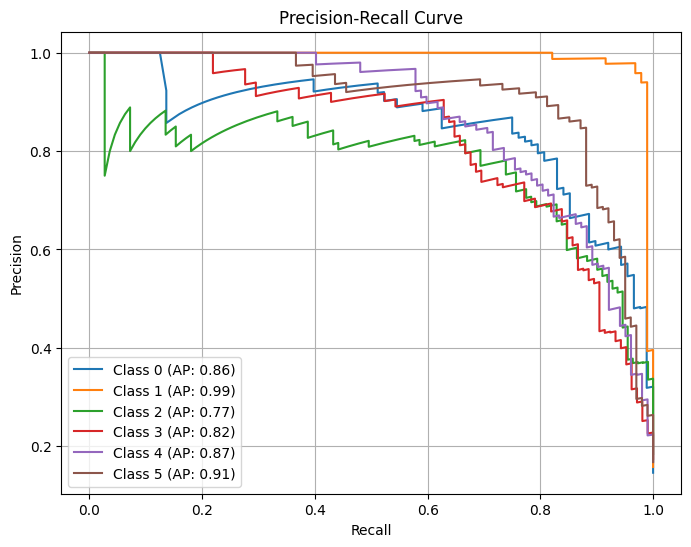


Training with 175 layers unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 97s 636ms/step - accuracy: 0.7019 - loss: 0.9974 - val_accuracy: 0.1694 - val_loss: 8.2512
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 315ms/step - accuracy: 0.9784 - loss: 0.0661 - val_accuracy: 0.1694 - val_loss: 5.4055
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 311ms/step - accuracy: 0.9927 - loss: 0.0388 - val_accuracy: 0.1728 - val_loss: 6.7584
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 307ms/step - accuracy: 0.9973 - loss: 0.0077 - val_accuracy: 0.1794 - val_loss: 6.3156
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - accuracy: 0.9950 - loss: 0.0122 - val_accuracy: 0.3488 - val_loss: 3.3616
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 311ms/step - accuracy: 0.9855 - loss: 0.0338 - val_accuracy: 0.3605 - val_loss: 3.7303
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - accuracy: 0.9897 - loss: 0.0404 - val_accuracy: 0.8239 - val_loss: 1.0684
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 309ms/step - acc

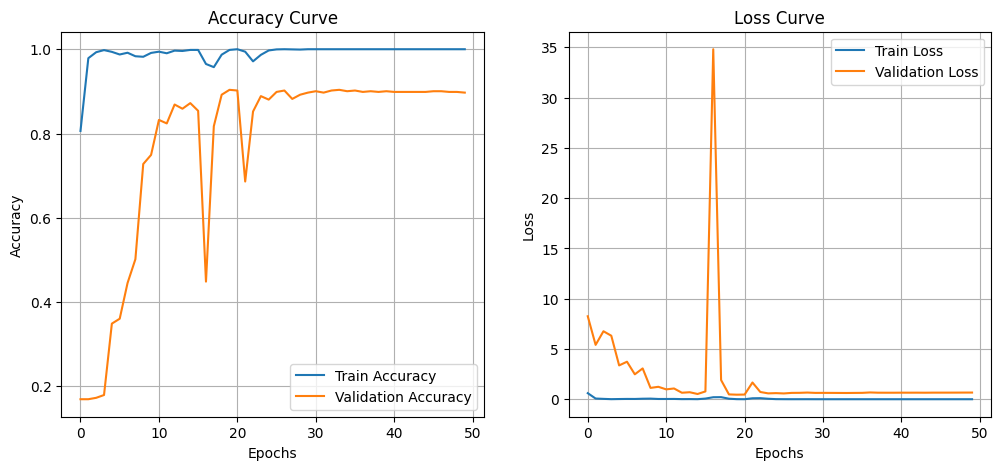

Confusion Matrix:
 [[80  0  0  0  0  8]
 [ 0 94  0  1  0  0]
 [ 0  0 95 12  4  0]
 [ 1  0 12 88  4  0]
 [ 0  0  6  2 94  0]
 [10  0  0  0  2 89]]


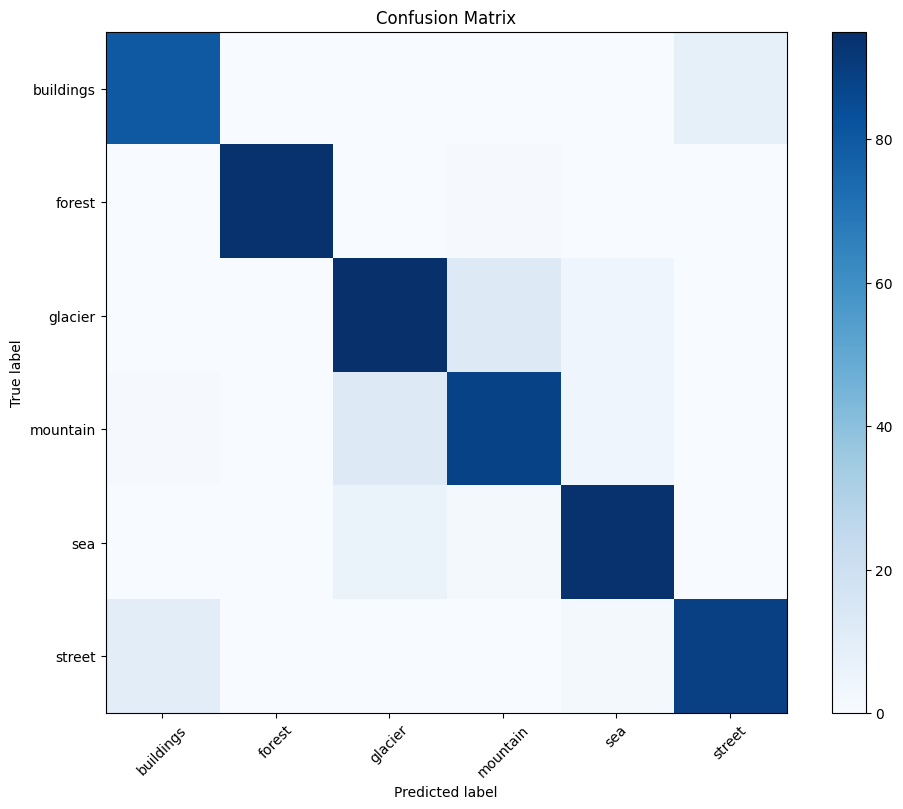

Classification Report:
               precision    recall  f1-score   support

   buildings       0.88      0.91      0.89        88
      forest       1.00      0.99      0.99        95
     glacier       0.84      0.86      0.85       111
    mountain       0.85      0.84      0.85       105
         sea       0.90      0.92      0.91       102
      street       0.92      0.88      0.90       101

    accuracy                           0.90       602
   macro avg       0.90      0.90      0.90       602
weighted avg       0.90      0.90      0.90       602



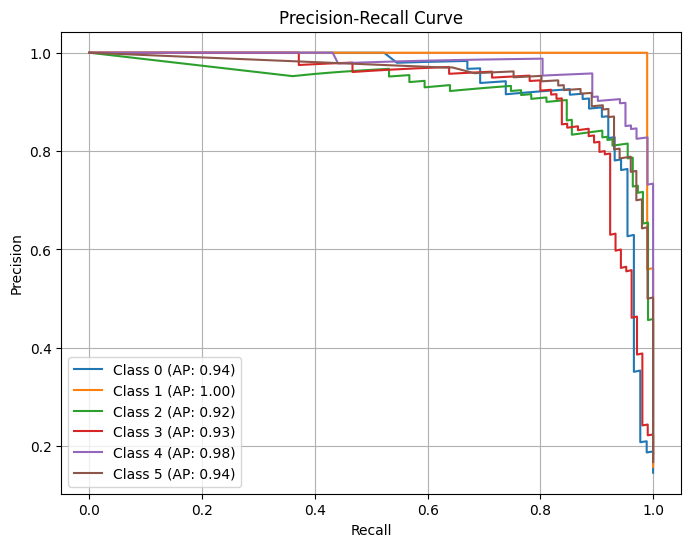

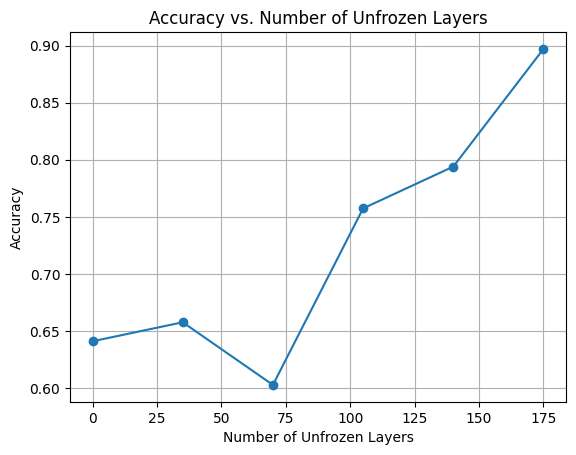

Experiment complete. Results: [(0, 0.6411960132890365), (35, 0.6578073089700996), (70, 0.6029900332225914), (105, 0.7574750830564784), (140, 0.7940199335548173), (175, 0.8970099667774086)]


In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the model using ResNet50 with a configurable number of layers to unfreeze
def define_model(num_classes, unfreeze_layers=0):
    # Load the pre-trained ResNet50 model without the top classifier layer
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze all layers by default
    for layer in base_model.layers:
        layer.trainable = False

    # Unfreeze the specified number of layers
    for i in range(len(base_model.layers) - unfreeze_layers, len(base_model.layers)):
        base_model.layers[i].trainable = True

    # Build the model
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Plot accuracy and loss curves
def plot_curves(history):
    plt.figure(figsize=(12, 5))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot Precision-Recall Curve
def plot_pr_curve(y_true, y_probs, num_classes):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import average_precision_score
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        ap = average_precision_score(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AP: {ap:.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


# Function to train and evaluate the model with different unfreezing configurations
def run_experiment(train_dir, test_dir, num_classes, divisions):
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    train_it = datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode='categorical', shuffle=True)
    test_it = datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode='categorical', shuffle=False)

    total_layers = len(ResNet50(weights='imagenet').layers)
    layers_per_division = total_layers // divisions

    results = []
    for i in range(divisions + 1):
        unfreeze_layers = i * layers_per_division
        print(f"\nTraining with {unfreeze_layers} layers unfrozen...")

        # Define and train the model
        model = define_model(num_classes, unfreeze_layers)
        history = model.fit(train_it, validation_data=test_it, epochs=50, verbose=1)  # Use fewer epochs for quick evaluation

        # Evaluate the model
        test_steps = len(test_it)
        y_probs = model.predict(test_it, steps=test_steps, verbose=1)
        y_pred = np.argmax(y_probs, axis=1)
        y_true = test_it.classes

        # Compute metrics
        accuracy = np.sum(y_pred == y_true) / len(y_true)
        results.append((unfreeze_layers, accuracy))
        print(f"Accuracy with {unfreeze_layers} unfrozen layers: {accuracy:.4f}")

        # Plot curves
        plot_curves(history)

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        print("Confusion Matrix:\n", cm)
        class_names = list(test_it.class_indices.keys())
        plot_confusion_matrix(cm, class_names)

        # Classification Report
        report = classification_report(y_true, y_pred, target_names=class_names)
        print("Classification Report:\n", report)

        # Precision-Recall Curves
        y_true_one_hot = np.zeros((len(y_true), num_classes))
        y_true_one_hot[np.arange(len(y_true)), y_true] = 1
        plot_pr_curve(y_true_one_hot, y_probs, num_classes)

    # Plot overall results
    unfreeze_counts, accuracies = zip(*results)
    plt.plot(unfreeze_counts, accuracies, marker='o')
    plt.title("Accuracy vs. Number of Unfrozen Layers")
    plt.xlabel("Number of Unfrozen Layers")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()

    return results

# Main function to execute the experiment
if __name__ == "__main__":
    train_dir = '/kaggle/working/split_dataset/train'
    test_dir = '/kaggle/working/split_dataset/test'
    num_classes = 6  # Update based on the dataset
    divisions = 5    # Number of divisions for unfreezing layers

    results = run_experiment(train_dir, test_dir, num_classes, divisions)
    print("Experiment complete. Results:", results)
